In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os 
sys.path.append("../../")

from data_loading import load_runs

## Defining numu sidebands

In [3]:
RUN = ["3","4b","4c","4d","5"]  # this can be a list of several runs, i.e. [1,2,3]

rundata_numu, mc_weights_numu, data_pot_numu = load_runs(
    RUN,
    data="muon_sideband",
    truth_filtered_sets=["nue", "drt"],
    loadshowervariables=True,
    loadsystematics=True,
    use_bdt=False,
    # set this to true to let the data loading function know that we are loading numu
    numupresel=True,
    loadnumuvariables=True,
    load_crt_vars=True,
    blinded=False,  # sideband needs to be unblinded to work
    enable_cache=True,
)

get_rundict: run_number= 1
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 3
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run3/numupresel/NuMuSideband_bnb_beam_on_peleeTuple_uboone_v08_00_00_70_run3.root
Dataset muon_sideband is a data or EXT file


/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)


is_mc= False
get_rundict: run_number= 3
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 3
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run3/numupresel/bnb_beam_off_peleeTuple_uboone_v08_00_00_70_run3.root
is_mc= False
get_rundict: run_number= 3
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 3
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run3/numupresel/overlay_peleeTuple_uboone_v08_00_00_70_run3_nu.root


../../data_loading.py:776: RuntimeWarning: invalid value encountered in true_divide
  df["proton_pz"] = np.where((mc_E_prot > 0), mc_pz_prot / mc_p_prot, np.nan)


is_mc= False


/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/pandas/core/generic.py:2505: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['weightsReint', 'weightsGenie', 'weightsFlux'], dtype='object')]

  encoding=encoding,


get_rundict: run_number= 3
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 3
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run3/numupresel/overlay_peleeTuple_uboone_v08_00_00_70_run3_nue.root
is_mc= False
get_rundict: run_number= 3
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 3
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run3/numupresel/overlay_peleeTuple_uboone_v08_00_00_70_run3_dirt.root
is_mc= False
get_rundict: run_number= 3
get_rundict: run_number= 1
get_rundict: run_number= 3
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
get_rundict: run_number= 1
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 4b
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run4b/numupresel/NuMuSideband_Run4b_bnb_beamOn_PeLee_ntuples_run4b_ana.root
Dataset muon_sideband is a data or EXT file
is_mc= Fal

/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in true_divide
  result = getattr(ufunc, method)(*inputs, **kwargs)


is_mc= False
get_rundict: run_number= 4d
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 4d
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run4d/numupresel/Run4d_BNB_dirt_overlay_Pandora_Unified_Reco2_reco2_ana.root
is_mc= False
get_rundict: run_number= 4d
get_rundict: run_number= 1
get_rundict: run_number= 4d
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
get_rundict: run_number= 1
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 5
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run5/numupresel/NuMuSideband_run5_bnb_beamon_PeLEE_ntuples_run5_ana.root
Dataset muon_sideband is a data or EXT file
is_mc= False
get_rundict: run_number= 5
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 5
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run5/numupresel/Run5_bnb_beamOff_PeLee_ntuples_run5_ana_ana

In [4]:
for key in rundata_numu:
    rundata_numu[key]['npi'] = rundata_numu[key].eval('npion+npi0')

In [5]:
from microfit.histogram import Binning, MultiChannelBinning

numu_binning = Binning.from_config("neutrino_energy", 14, (0.15, 1.55), "neutrino reconstructed energy [GeV]")

numu_binning_np = numu_binning.copy()
numu_binning_np.label = "NUMUCRTNP0PI"
numu_binning_np.set_selection(preselection="NUMUCRT", selection="NUMUCRTNP0PI")

numu_binning_zpi = numu_binning.copy()
numu_binning_zpi.label = "NUMUCRT0P0PI"
numu_binning_zpi.set_selection(preselection="NUMUCRT", selection="NUMUCRT0P0PI")

numu_binning_inclusive = numu_binning.copy()
numu_binning_inclusive.label = "NUMUCRT"
numu_binning_inclusive.set_selection(preselection="NUMUCRT", selection="NUMUCRT")

sideband_binning = MultiChannelBinning([numu_binning_np, numu_binning_zpi, numu_binning_inclusive])

In [6]:
from microfit.histogram import RunHistGenerator

sideband_generator = RunHistGenerator(
    rundata_numu,
    sideband_binning,
    data_pot=data_pot_numu,
)

../../microfit/run_plotter.py:115: UserWarning: No signal category found in the MC hists. Not separating signal.
  "No signal category found in the MC hists. Not separating signal."
../../microfit/histogram/histogram.py:536: UserWarning: The internal _bin_counts array has off-diagonal elements. The off-diagonal elements will be lost when dividing by an ndarray.
  "The internal _bin_counts array has off-diagonal elements. "


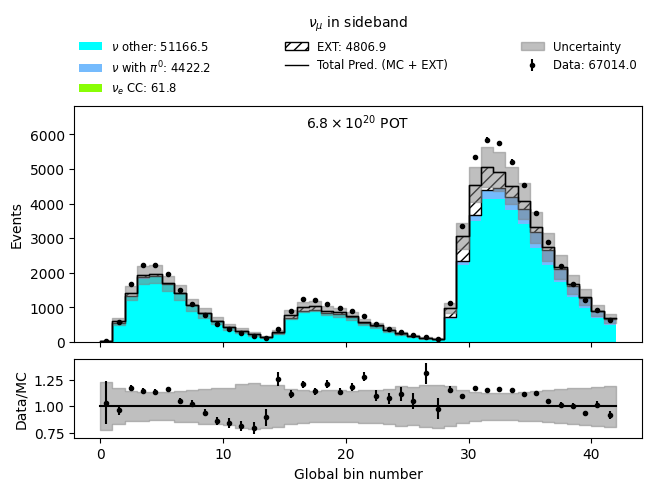

In [7]:
from microfit.run_plotter import RunHistPlotter

ax, ax_ratio = RunHistPlotter(sideband_generator).plot(
    category_column="paper_category", include_multisim_errors=True, show_data_mc_ratio=True, add_ext_error_floor=False,
)
legend = ax.get_legend()
legend.set_title(r"$\nu_\mu$ in sideband")


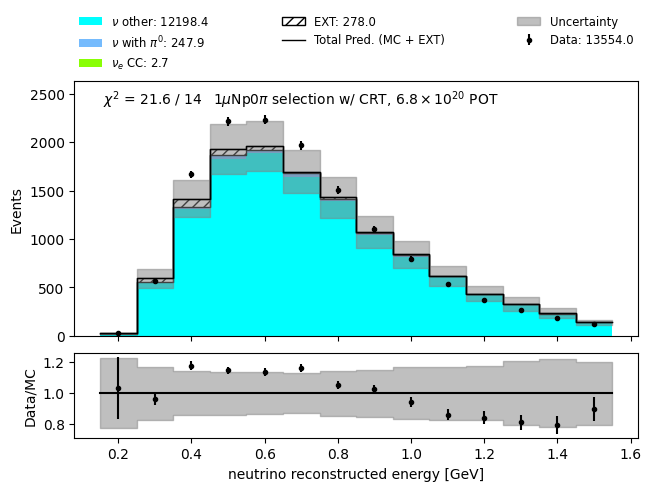

In [8]:
ax, ax_ratio = RunHistPlotter(sideband_generator).plot(
    category_column="paper_category", include_multisim_errors=True, show_data_mc_ratio=True, add_ext_error_floor=False, channel="NUMUCRTNP0PI", show_chi_square=True
)


<AxesSubplot:xlabel='Global bin number', ylabel='Events'>

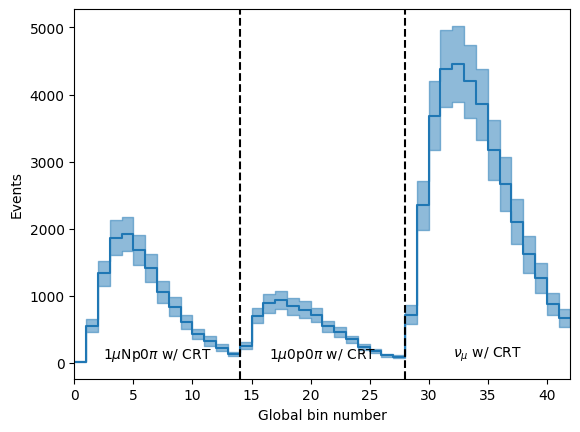

In [9]:
combined_sideband_hist = sideband_generator.get_mc_hist(include_multisim_errors=True)
combined_sideband_hist.draw()

<AxesSubplot:title={'center':'Correlation matrix'}>

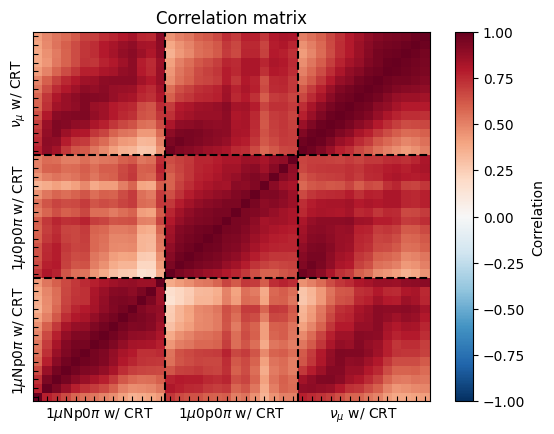

In [10]:
combined_sideband_hist.draw_covariance_matrix()

## Define two-shower sideband

In [11]:
RUN = ["3","4b","4c","4d","5"]  # this can be a list of several runs, i.e. [1,2,3]
rundata, mc_weights, data_pot = load_runs(
    RUN,
    data="two_shr_sideband",  # which data to load
    # truth_filtered_sets=["nue", "drt", "nc_pi0", "cc_pi0", "cc_nopi", "cc_cpi", "nc_nopi", "nc_cpi"],
    # Which truth-filtered MC sets to load in addition to the main MC set. At least nu_e and dirt
    # are highly recommended because the statistics at the final level of the selection are very low.
    truth_filtered_sets=["nue", "drt"],
    # Choose which additional variables to load. Which ones are required may depend on the selection
    # you wish to apply.
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=False,
    loadsystematics=True,
    load_crt_vars=True,
    # Load the nu_e set one more time with the LEE weights applied
    load_lee=False,
    # With the cache enabled, by default the loaded dataframes will be stored as HDF5 files
    # in the 'cached_dataframes' folder. This will speed up subsequent loading of the same data.
    enable_cache=True,
    # Since this is Open Data, we are allowed to unblind the data. By default, the data is blinded.
    blinded=False,
)

get_rundict: run_number= 1
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 3
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run3/nuepresel/TwoShowers_bnb_beam_on_peleeTuple_uboone_v08_00_00_70_run3.root
Dataset two_shr_sideband is a data or EXT file


../../data_loading.py:1097: RuntimeWarning: overflow encountered in multiply
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../data_loading.py:1097: RuntimeWarning: invalid value encountered in subtract
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../data_loading.py:613: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
../../data_loading.py:613: RuntimeWarning: overflow encountered in float_scalars
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))


is_mc= False
get_rundict: run_number= 3
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 3
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run3/nuepresel/bnb_beam_off_peleeTuple_uboone_v08_00_00_70_run3.root


/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


is_mc= False
get_rundict: run_number= 3
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 3
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run3/nuepresel/overlay_peleeTuple_uboone_v08_00_00_70_run3_nu.root


../../data_loading.py:776: RuntimeWarning: invalid value encountered in true_divide
  df["proton_pz"] = np.where((mc_E_prot > 0), mc_pz_prot / mc_p_prot, np.nan)


is_mc= True


/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/pandas/core/generic.py:2505: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['weightsReint', 'weightsGenie', 'weightsFlux'], dtype='object')]

  encoding=encoding,


get_rundict: run_number= 3
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 3
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run3/nuepresel/overlay_peleeTuple_uboone_v08_00_00_70_run3_nue.root
is_mc= True
get_rundict: run_number= 3
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 3
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run3/nuepresel/overlay_peleeTuple_uboone_v08_00_00_70_run3_dirt.root
is_mc= True
get_rundict: run_number= 3
get_rundict: run_number= 1
get_rundict: run_number= 3
The sideband data you're using had the following query applied:
n_showers_contained >= 2
I will also apply this query to the MC you're loading
get_rundict: run_number= 1
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 4b
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run4b/nuepresel/TwoShowers_Run4b_bnb_beamOn_PeLee_ntuples_run4b_ana.root
Dataset two_shr_sideband is a data or EXT file
is_mc

../../data_loading.py:1132: RuntimeWarning: invalid value encountered in sqrt
  - reco_pz_hadsum * reco_pz_hadsum


is_mc= True
get_rundict: run_number= 4b
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 4b
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run4b/nuepresel/Run4b_BNB_dirt_overlay_Pandora_Reco2_reco2_ana.root
is_mc= True
get_rundict: run_number= 4b
get_rundict: run_number= 1
get_rundict: run_number= 4b
The sideband data you're using had the following query applied:
n_showers_contained >= 2
I will also apply this query to the MC you're loading
get_rundict: run_number= 1
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 4c
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run4c/nuepresel/TwoShowers_Run4c_bnb_beamOn_PeLee_ntuples_run4c_ana_ana.root
Dataset two_shr_sideband is a data or EXT file
is_mc= False
get_rundict: run_number= 4c
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 4c
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run4c/nuepresel/Run4c_bnb_beamOff_PeLee_ntuples_run

In [12]:
two_shr_sideband_binning = Binning.from_config("reco_e", 14, (0.15, 1.55), "neutrino reconstructed energy [GeV]")
two_shr_sideband_binning.label = "TWOSHR"

two_shr_sideband_generator = RunHistGenerator(
    rundata,
    two_shr_sideband_binning,
    data_pot=data_pot,
    selection="ZPLOOSESELTWOSHR",
    preselection="ZPTwoShrCRT",
)

(<AxesSubplot:ylabel='Events'>,
 <AxesSubplot:xlabel='neutrino reconstructed energy [GeV]', ylabel='Data/MC'>)

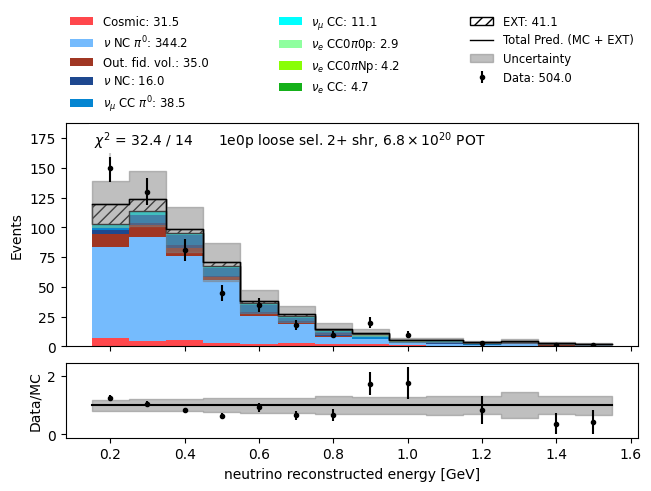

In [13]:
RunHistPlotter(two_shr_sideband_generator).plot(category_column="category", include_multisim_errors=True, show_data_mc_ratio=True, add_ext_error_floor=False, show_chi_square=True)

## Load the signals

In [14]:
import sys, os 
sys.path.append("../../")

from data_loading import load_runs

In [15]:
RUN = ["1","2","3","4b","4c","4d","5"]
# RUN = ["3"]
signal_rundata, signal_mc_weights, signal_data_pot = load_runs(
    RUN,
    data="bnb",  # which data to load
    # truth_filtered_sets=["nue", "drt", "nc_pi0", "cc_pi0", "cc_nopi", "cc_cpi", "nc_nopi", "nc_cpi"],
    # Which truth-filtered MC sets to load in addition to the main MC set. At least nu_e and dirt
    # are highly recommended because the statistics at the final level of the selection are very low.
    truth_filtered_sets=["nue", "drt"],
    # Choose which additional variables to load. Which ones are required may depend on the selection
    # you wish to apply.
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    # Load the nu_e set one more time with the LEE weights applied
    load_lee=True,
    # With the cache enabled, by default the loaded dataframes will be stored as HDF5 files
    # in the 'cached_dataframes' folder. This will speed up subsequent loading of the same data.
    enable_cache=True,
    blinded=True,
)

get_rundict: run_number= 1
get_rundict: run_number= 1
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 1
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run1/nuepresel/bnb_beam_off_peleeTuple_uboone_v08_00_00_70_run1.root
is_mc= False
get_rundict: run_number= 1
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 1
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run1/nuepresel/overlay_peleeTuple_uboone_v08_00_00_70_run1_nu.root
is_mc= True
get_rundict: run_number= 1
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 1
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run1/nuepresel/overlay_peleeTuple_uboone_v08_00_00_70_run1_nue.root
is_mc= True
get_rundict: run_number= 1
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 1
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run1/nuepresel/overlay_peleeTuple_uboone_v08_00_00_70_run1_dirt.root
is_mc= True

In [39]:
from microfit.histogram import Binning, MultiChannelBinning

binning_def = ("reco_e", 10, (0.15, 1.55), r"Reconstructed Energy [GeV]")  # reproduce technote

binning_npl = Binning.from_config(*binning_def)
binning_npl.set_selection(preselection="NP", selection="NPBDT")
binning_npl.label = "NPBDT"

binning_zpl = Binning.from_config(*binning_def)
binning_zpl.set_selection(preselection="ZP", selection="ZPBDT")
binning_zpl.label = "ZPBDT"

signal_binning = MultiChannelBinning([binning_npl, binning_zpl])

In [40]:
from microfit.parameters import Parameter, ParameterSet
from microfit.signal_generators import SignalOverBackgroundGenerator
from microfit.histogram import RunHistGenerator

signal_parameters = ParameterSet(
    [
        Parameter("signal_strength", 1.0, bounds=(0, 10)),
    ]
)

signal_generator = RunHistGenerator(
    signal_rundata,
    signal_binning,
    data_pot=signal_data_pot,
    mc_hist_generator_cls=SignalOverBackgroundGenerator,
    parameters=signal_parameters,
)

In [41]:
mc_hists = signal_generator.get_mc_hists(category_column="paper_category")

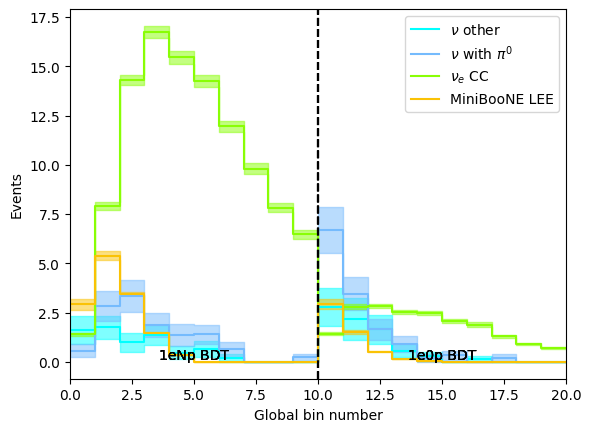

In [42]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots()
for mc_hist in mc_hists.values():
    mc_hist.draw(ax=ax, label=mc_hist.tex_string)
ax.legend()

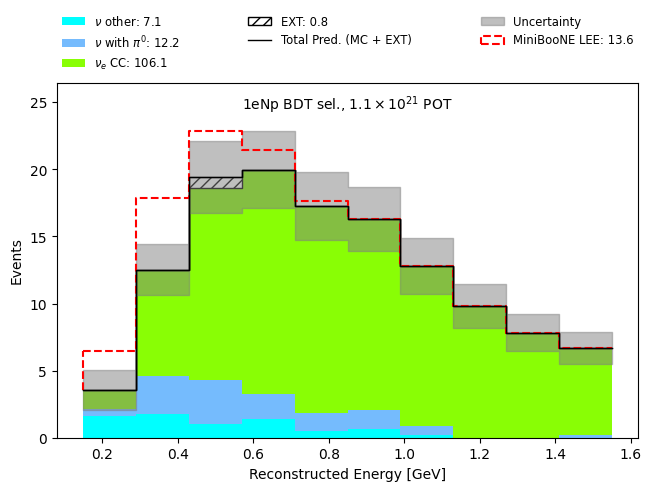

In [43]:
from microfit.run_plotter import RunHistPlotter

# signal_generator.parameters["signal_strength"].value = 1.0


ax = RunHistPlotter(signal_generator).plot(
    category_column="paper_category", 
    include_multisim_errors=True,
    show_data_mc_ratio=False,
    add_ext_error_floor=False,
    channel="NPBDT", 
    # separate_signal=False
)

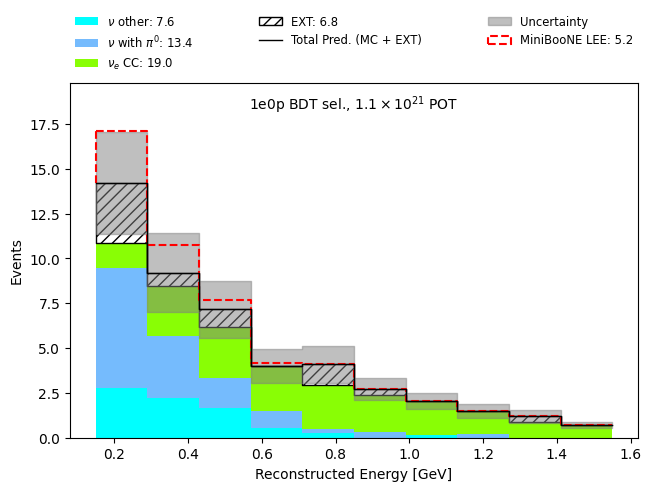

In [44]:
ax = RunHistPlotter(signal_generator).plot(
    category_column="paper_category", include_multisim_errors=True, show_data_mc_ratio=False, add_ext_error_floor=False,
    channel="ZPBDT",
)

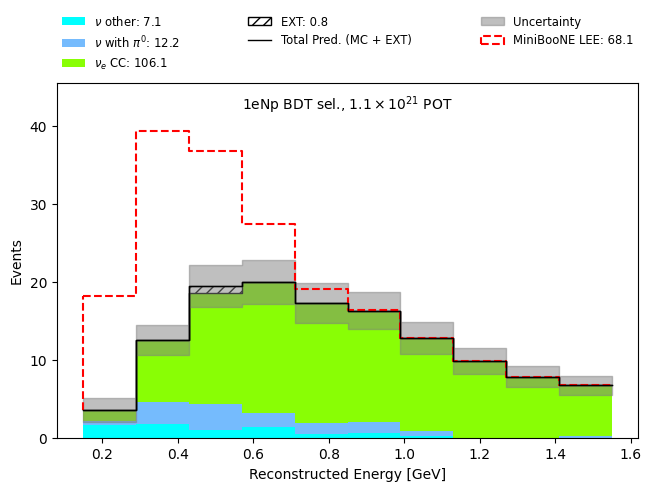

In [45]:
signal_generator.parameters["signal_strength"].value = 5.0

ax = RunHistPlotter(signal_generator).plot(
    category_column="paper_category", include_multisim_errors=True, show_data_mc_ratio=False, add_ext_error_floor=False,
    channel="NPBDT",
)

## Assemble Analysis

In [46]:
from microfit.analysis import MultibandAnalysis

analysis = MultibandAnalysis(
    run_hist_generators=[sideband_generator, two_shr_sideband_generator, signal_generator],
    constraint_channels=["NUMUCRTNP0PI", "NUMUCRT0P0PI", "TWOSHR"],
    signal_channels=["NPBDT", "ZPBDT"],
)


In [47]:
analysis.parameters["signal_strength"].value = 1.0

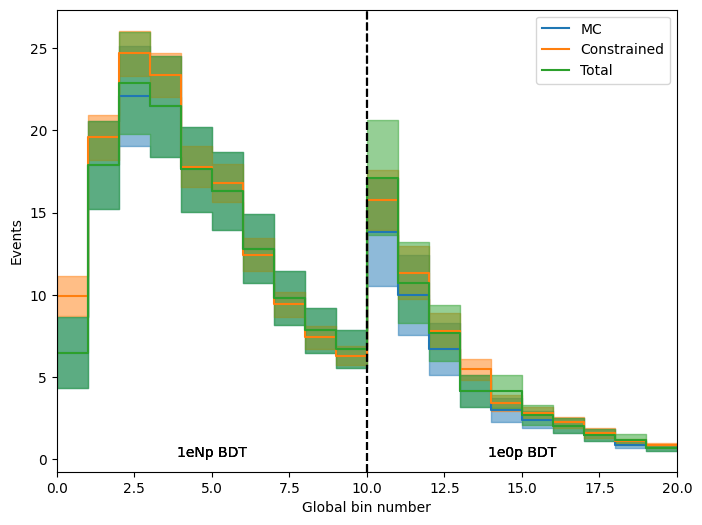

In [48]:
import matplotlib.pyplot as plt

mc_hist = analysis.get_mc_hist(include_multisim_errors=True)
mc_hist_constrained = analysis.get_mc_hist(include_multisim_errors=True, use_sideband=True)
total_hist = analysis.generate_multiband_histogram(include_multisim_errors=True, include_non_signal_channels=False)

fig, ax = plt.subplots(figsize=(8, 6))
mc_hist.draw(ax=ax, label="MC")
mc_hist_constrained.draw(ax=ax, label="Constrained")
total_hist.draw(ax=ax, label="Total")
ax.legend()


In [49]:
analysis.parameters["signal_strength"].value = 1.0

/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


(<AxesSubplot:xlabel='Global bin number', ylabel='Events'>, None)

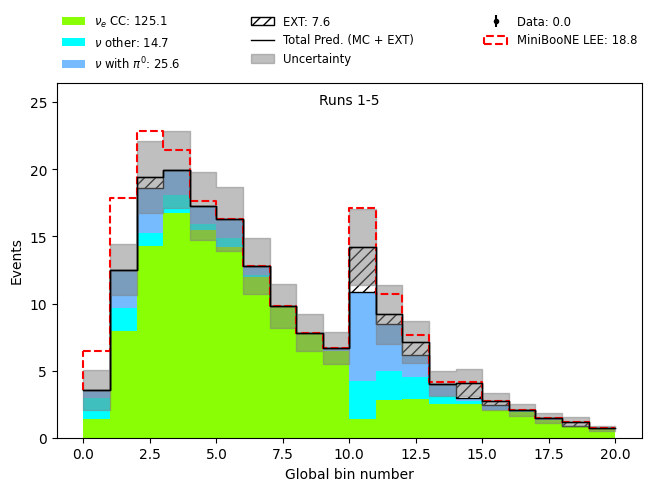

In [50]:
RunHistPlotter(analysis).plot(
    category_column="paper_category", include_multisim_errors=True, show_data_mc_ratio=False, add_ext_error_floor=False, title="Runs 1-5", use_sideband=False,
)

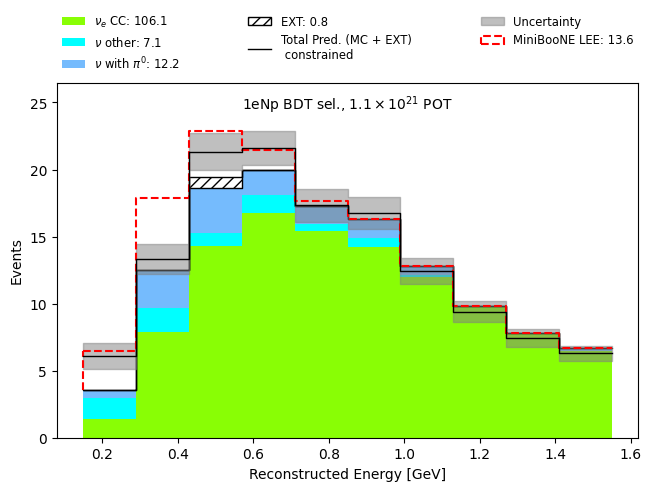

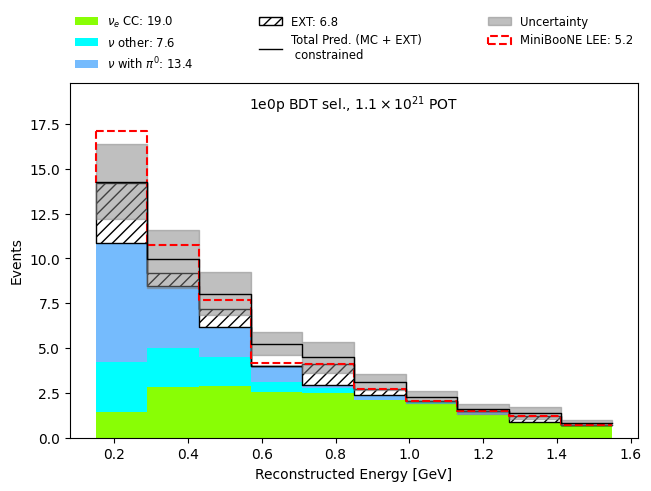

In [51]:
analysis.plot_signals(
    add_ext_error_floor=False, include_multisim_errors=True, show_data_mc_ratio=False, use_sideband=True,
    separate_figures=True,
)

In [52]:
analysis.plot_sidebands(
    include_multisim_errors=True,
    show_data_mc_ratio=True,
    add_ext_error_floor=False,
    separate_figures=True,
    save_path="."
)

(<Figure size 800x600 with 2 Axes>,
 <AxesSubplot:title={'center':'Correlation matrix'}>)

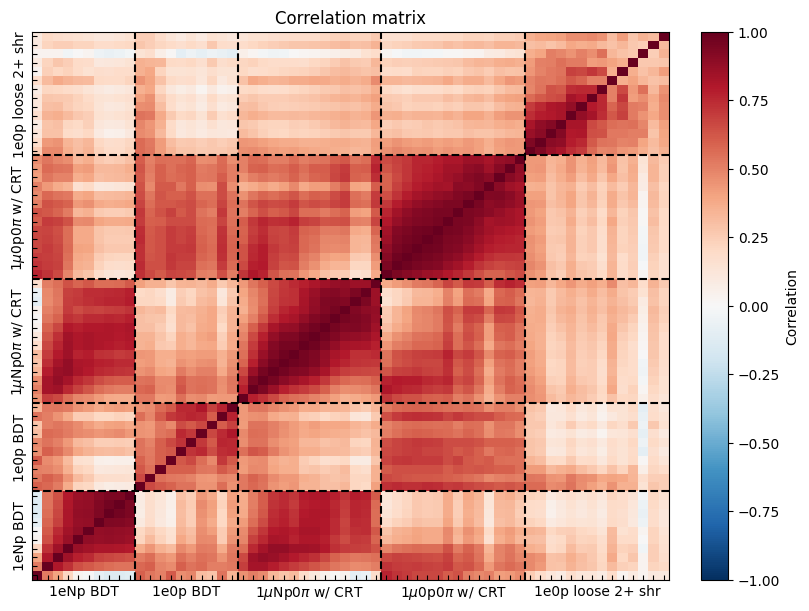

In [53]:
analysis.plot_correlation()

In [54]:
analysis.parameters

Parameters:
Name	Value	Unit	Bounds
-------------------------------
signal_strength	1		(0, 10)

In [55]:
analysis.parameters["signal_strength"].value = 1.0

multi_channel_mc_hist = analysis.generate_multiband_histogram(
    include_multisim_errors=True,
    include_non_signal_channels=True,
)

<AxesSubplot:xlabel='Global bin number', ylabel='Events'>

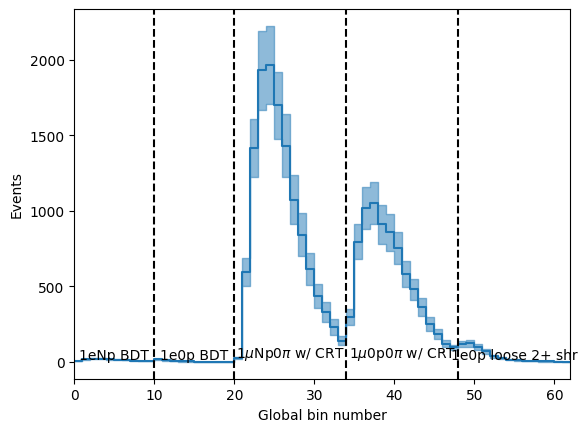

In [56]:
multi_channel_mc_hist.draw()

<AxesSubplot:title={'center':'Correlation matrix'}>

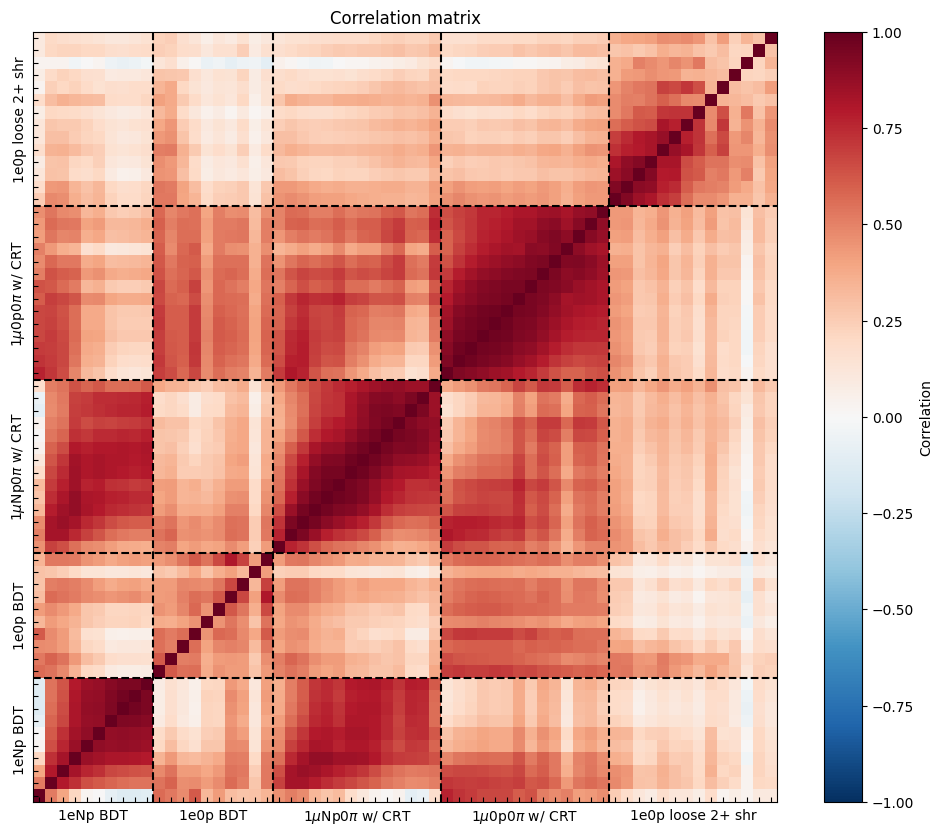

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 10))
# Getting the channels in the same order as in Giuseppe's plots
channels = ["NPBDT", "ZPBDT", "NUMUCRTNP0PI", "NUMUCRT0P0PI", "TWOSHR"]
multi_channel_mc_hist[channels].draw_covariance_matrix(ax=ax)

In [58]:
multi_channel_hist_unconstrained = analysis.generate_multiband_histogram(
    include_multisim_errors=True, use_sideband=False,
)

multi_channel_hist_new_constraints = analysis.generate_multiband_histogram(
    include_multisim_errors=True, use_sideband=True,
    constraint_channels=["NUMUCRTNP0PI", "NUMUCRT0P0PI", "TWOSHR"],
)

multi_channel_hist_old_constraints = analysis.generate_multiband_histogram(
    include_multisim_errors=True, use_sideband=True,
    constraint_channels=["NUMUCRT"],
)

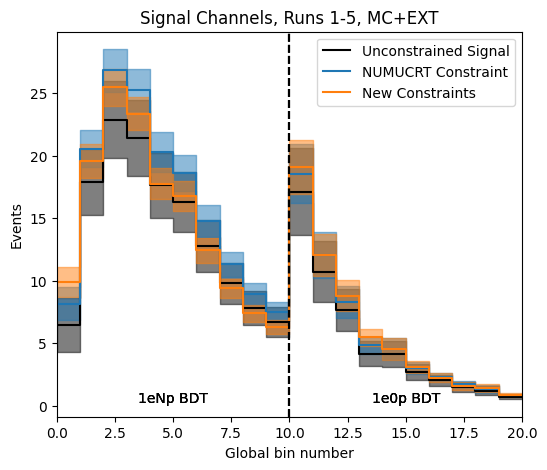

In [59]:
fig, ax = plt.subplots(figsize=(6, 5))
multi_channel_hist_unconstrained.draw(ax=ax, label="Unconstrained Signal", color="black")
multi_channel_hist_old_constraints.draw(ax=ax, label="NUMUCRT Constraint")
multi_channel_hist_new_constraints.draw(ax=ax, label="New Constraints")

ax.legend()
ax.set_title("Signal Channels, Runs 1-5, MC+EXT")
fig.savefig("signal_channels_runs1-5_constraint_comparison.pdf")


## Get the Sensitivity

In [60]:
analysis.constraint_channels = ["NUMUCRTNP0PI", "NUMUCRT0P0PI", "TWOSHR"]
analysis.signal_channels = ["NPBDT", "ZPBDT"]

two_hypo_result_new_constraints = analysis.two_hypothesis_test(
    h0_params=ParameterSet([Parameter("signal_strength", 0.0)]),
    h1_params=ParameterSet([Parameter("signal_strength", 1.0)]),
    sensitivity_only=True,
    n_trials=10000,
)

Generating H0 histogram
Generating H1 histogram


Generating pseudo-experiments: 100%|██████████| 10000/10000 [01:06<00:00, 150.90it/s]


In [61]:
analysis.constraint_channels = ["NUMUCRT"]
analysis.signal_channels = ["NPBDT", "ZPBDT"]

two_hypo_result_old_constraints = analysis.two_hypothesis_test(
    h0_params=ParameterSet([Parameter("signal_strength", 0.0)]),
    h1_params=ParameterSet([Parameter("signal_strength", 1.0)]),
    sensitivity_only=True,
    n_trials=10000,
)

Generating H0 histogram
Generating H1 histogram


Generating pseudo-experiments: 100%|██████████| 10000/10000 [01:05<00:00, 153.25it/s]


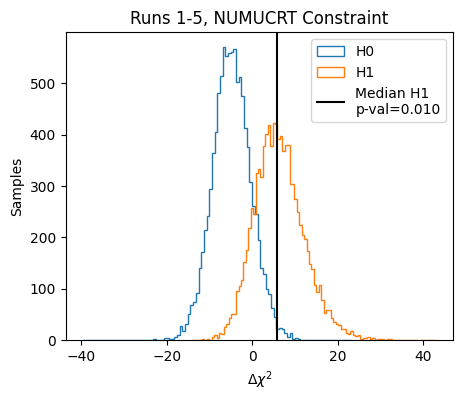

In [62]:
plt.figure(figsize=(5, 4))
plt.hist(two_hypo_result_old_constraints["samples_h0"], bins=100, label="H0", histtype="step")
plt.hist(two_hypo_result_old_constraints["samples_h1"], bins=100, label="H1", histtype="step")
plt.axvline(two_hypo_result_old_constraints["ts_median_h1"], color="black", label=f"Median H1\np-val={two_hypo_result_old_constraints['median_pval']:.3f}")
plt.legend()
plt.xlabel(r"$\Delta \chi^2$")
plt.ylabel("Samples")
plt.title("Runs 1-5, NUMUCRT Constraint")
plt.savefig("runs1-5_sensitivity_numucrt_constraint.pdf")
plt.show()

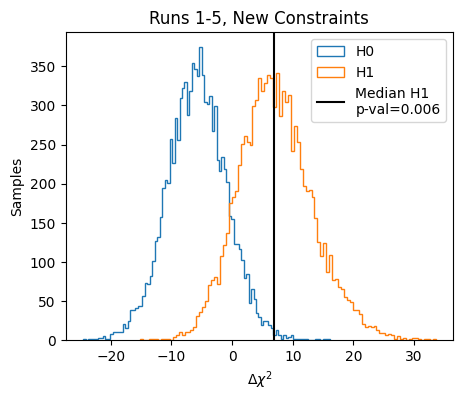

In [63]:
plt.figure(figsize=(5, 4))
plt.hist(two_hypo_result_new_constraints["samples_h0"], bins=100, label="H0", histtype="step")
plt.hist(two_hypo_result_new_constraints["samples_h1"], bins=100, label="H1", histtype="step")
plt.axvline(two_hypo_result_new_constraints["ts_median_h1"], color="black", label=f"Median H1\np-val={two_hypo_result_new_constraints['median_pval']:.3f}")
plt.legend()
plt.xlabel(r"$\Delta \chi^2$")
plt.ylabel("Samples")
plt.title("Runs 1-5, New Constraints")
plt.savefig("runs1-5_sensitivity_new_constraints.pdf")
plt.show()

In [65]:
import numpy as np

scan_points = np.linspace(0, 5, 40)
fit_grid = {
    "signal_strength": np.linspace(0, 10, 50),
}
fc_scan_results = analysis.scan_asimov_fc_sensitivity(
    scan_points=scan_points,
    parameter_name="signal_strength",
    n_trials=250,
    fit_method="grid_scan",
    fit_grid=fit_grid,
)

Running FC scan over 40 points in signal_strength...


Scanning:   0%|          | 0/40 [00:00<?, ?it/s]

Scanning: 100%|██████████| 40/40 [08:25<00:00, 12.63s/it]


Calculating Asimov sensitivity for 40 points...


In [66]:
from microfit.fileio import to_json

# to_json("runs1-5_numucrt_fc_scan_results.json", fc_scan_results)

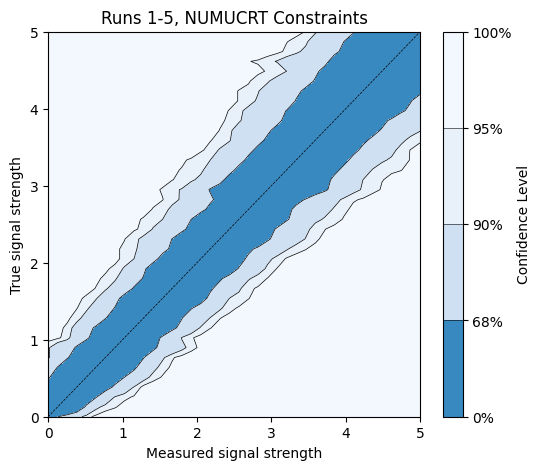

In [67]:
fig, ax = plt.subplots(figsize=(6, 5))

MultibandAnalysis.plot_fc_scan_results(
    fc_scan_results,
    parameter_tex="signal strength",
    ax=ax,
)
ax.set_xlim((0, 5))
ax.set_ylim((0, 5))
ax.set_title("Runs 1-5, NUMUCRT Constraints")
fig.savefig("runs1-5_fc_scan_numucrt_constraint.pdf")

In [68]:
analysis.constraint_channels = ["NUMUCRTNP0PI", "NUMUCRT0P0PI", "TWOSHR"]
analysis.signal_channels = ["NPBDT", "ZPBDT"]

import numpy as np

scan_points = np.linspace(0, 5, 40)
fit_grid = {
    "signal_strength": np.linspace(0, 10, 50),
}
fc_scan_results = analysis.scan_asimov_fc_sensitivity(
    scan_points=scan_points,
    parameter_name="signal_strength",
    n_trials=250,
    fit_method="grid_scan",
    fit_grid=fit_grid,
)

Running FC scan over 40 points in signal_strength...


Scanning:   0%|          | 0/40 [00:00<?, ?it/s]

Scanning: 100%|██████████| 40/40 [08:22<00:00, 12.57s/it]


Calculating Asimov sensitivity for 40 points...


In [69]:
to_json("runs1-5_new_constraints_fc_scan_results.json", fc_scan_results)

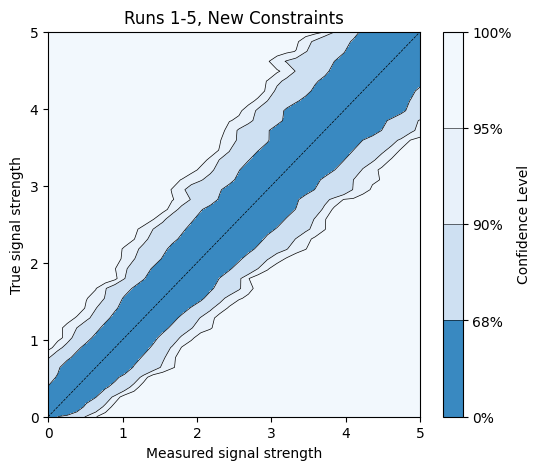

In [70]:
fig, ax = plt.subplots(figsize=(6, 5))

MultibandAnalysis.plot_fc_scan_results(
    fc_scan_results,
    parameter_tex="signal strength",
    ax=ax,
)
ax.set_xlim((0, 5))
ax.set_ylim((0, 5))

ax.set_title("Runs 1-5, New Constraints")
fig.savefig("runs1-5_fc_scan_new_constraints.pdf")

In [71]:
from microfit.fileio import from_json


fc_scan_results_old_constraints = from_json("runs1-5_numucrt_fc_scan_results.json")

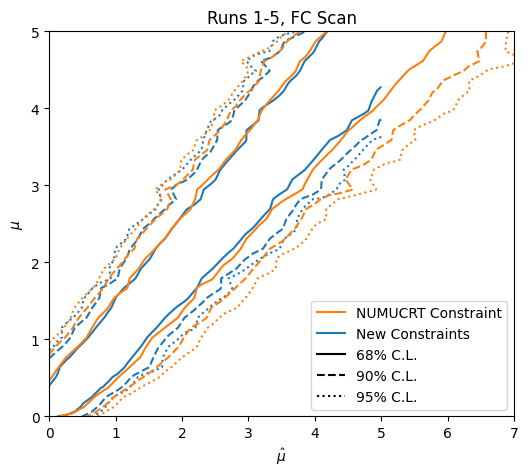

In [72]:
fig, ax = plt.subplots(figsize=(6, 5))
levels = [0.0, 0.68, 0.9, 0.95, 1.0]
linestyles = ["-", "-", "--", ":"]
pval_map = fc_scan_results["pval_map"]
X, Y = fc_scan_results["measured_map"], fc_scan_results["truth_map"]
# draw contours for fc_scan_results and for fc_scan_results_old_constraints on the same plot
ax.contour(X, Y, pval_map, levels=levels, colors="C0", linestyles=linestyles)
pval_map_old_constraints = fc_scan_results_old_constraints["pval_map"]
X_old_constraints, Y_old_constraints = fc_scan_results_old_constraints["measured_map"], fc_scan_results_old_constraints["truth_map"]
ax.contour(X_old_constraints, Y_old_constraints, pval_map_old_constraints, levels=levels, colors="C1", linestyles=linestyles)
ax.set_xlabel(r"$\hat{\mu}$")
ax.set_ylabel(r"$\mu$")
ax.set_title("Runs 1-5, FC Scan")

# Add a legend
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], color="C1", linestyle="-", label="NUMUCRT Constraint"),
    Line2D([0], [0], color="C0", linestyle="-", label="New Constraints"),
    # show the contour levels in the legend in black
    Line2D([0], [0], color="black", linestyle="-", label="68% C.L."),
    Line2D([0], [0], color="black", linestyle="--", label="90% C.L."),
    Line2D([0], [0], color="black", linestyle=":", label="95% C.L."),
]
ax.legend(handles=legend_elements, loc="lower right")

fig.savefig("runs1-5_fc_scan_comparison.pdf")